
 
 
 <H1> <U>PREDICTION USING SUPERVISED ML </H1></U>
    <body style = "background color:blue;"> 
    In this problem we predict the Marks of students based on the no. of Hours studied.<BR>
        We use simple linear regression as it involves only onE target variable i.e Hours </body>
    
             
 




In [13]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib

<H2><i> <b> LOADING THE DATA </b> </i> 

In [3]:
dt=pd.read_excel(r"C:\Users\Vishista\Downloads\studydata.xlsx")
print(dt.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes
None


In [4]:
dt.shape

(25, 2)

In [5]:
#checking missing values
dt.isna().any()

Hours     False
Scores    False
dtype: bool

In [6]:
#checking of null vales in the dataset
dt.isna==True

False

In [7]:
print(dt.dtypes)

Hours     float64
Scores      int64
dtype: object


In [8]:
dt.head(24)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<h1> Visualizing our Data </h1>

Text(0,0.5,'Scores')

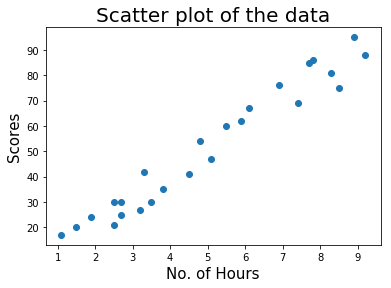

In [9]:
# method 1 
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(dt["Hours"], dt['Scores'])
plt.title('Scatter plot of the data',size=20)
plt.xlabel('No. of Hours',size=15)
plt.ylabel('Scores', size =15)


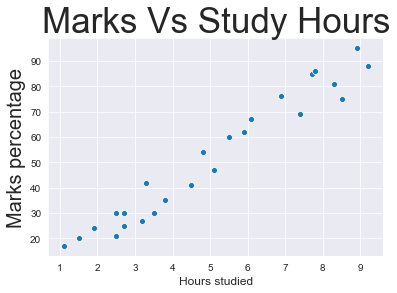

In [10]:
#method 2

import seaborn as sns
sns.set_style('darkgrid')
sns.scatterplot(x= dt['Hours'], y= dt['Scores'])
plt.title('Marks Vs Study Hours', size=35)
plt.ylabel('Marks percentage', size=20)
plt.xlabel('Hours studied', size=12)
plt.show()



C:\Users\Vishista\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


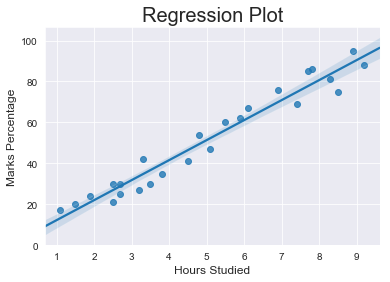

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [15]:
sns.regplot(x= dt['Hours'], y= dt['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(dt.corr())

In [20]:
dt.shape

(25, 2)

In [21]:
X=dt.iloc[:,:-1].values
y=dt.iloc[:,-1].values

In [22]:
len(X)

25

In [23]:
len(y)

25

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=100)


In [26]:
len(X_train)

20

In [27]:
X_train

array([[7.4],
       [6.9],
       [4.8],
       [9.2],
       [4.5],
       [3.5],
       [7.8],
       [2.5],
       [5.1],
       [2.7],
       [1.1],
       [1.9],
       [6.1],
       [3.2],
       [7.7],
       [2.5],
       [8.9],
       [5.5],
       [8.5],
       [8.3]])

In [28]:
len(X_test)

5

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

<h2>TRAINING THE MODEL

In [30]:
#training the model
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
pred_y = reg.predict(X_test)
pred_y

array([28.54512294, 39.36411177, 34.44638957, 60.01854497, 16.74258969])

In [32]:
y_test

array([25, 35, 42, 62, 20], dtype=int64)

In [33]:
reg.score(X_test, y_test)

0.9050356232459791

<h2>VISUALIZING THE TEST SCORES

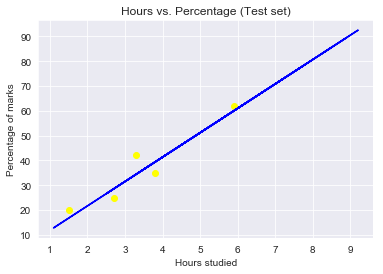

In [41]:
plt.scatter(X_test, y_test, color = 'yellow')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('Hours vs. Percentage (Test set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()

<h2>COMPARING THE SCORES

In [35]:
compare_scores= pd.DataFrame({'Actual Marks': y_test, 'Predicted marks': pred_y})
compare_scores

,Actual Marks,Predicted marks
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


<h2>TESTING THE ACCURACY OF THE MODEL

In [36]:
#calculating the accuracy of the model

from sklearn.metrics import mean_absolute_error
print('Mean absolute error :', mean_absolute_error(y_test,pred_y))

Mean absolute error : 4.140342096254413


In [37]:
hours=[9.25]
answer=reg.predict([hours])
answer

array([92.96728365])

<H1>RESULT:<BR>
<H2>If a student studies for 9.25 hours, he/she is likely to get 92.96 marks!